# Libraries
<a id="step-1"></a>
## Import the required libraries

In [1]:
from google.colab import drive
drive.mount('/text/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

ModuleNotFoundError: No module named 'spacy'

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# gensim library is installed for topic modeling
#!pip install gensim==3.8

# Get data
## Import Dataset

In [64]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
dataset = pd.read_excel('tweets_extraction.xlsx ')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print("Complete Data:")
print("=============\n")
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train Dataset:



,id,lead,text,contributors,genres,kicker,modifiedAt,provenance,publisher,releasedAt,sourceId,sourceUrl,webUrl,resources,title,url,relatedArticles
0,urn:pdp:cms_srf:article:urn:srf:article:20265063,Seit 1970 gehen die untersuchten Wirbeltierbestände im Durchschnitt um 69 Prozent zurück. Trotzd...,Die internationale Rote Liste der gefährdeten Arten verbucht mittlerweile mehr als 42'100 Tier- ...,NaN,News;International,WWF-Jahresbilanz,2023-01-01T13:02:00Z,CMS_SRF,SRF,2023-01-01T13:02:00Z,urn:srf:article:20265063,https://www.srf.ch/article/20265063/json,https://www.srf.ch/news/international/wwf-jahresbilanz-welche-tiere-verschwinden-und-welche-ihr-...,NaN,Welche Tiere verschwinden und welche ihr Comeback feiern,https://www.srf.ch/article/20265063,NaN
1,urn:pdp:cms_srf:article:urn:srf:article:20264619,NaN,"Finanzkrisen, Migrationkrisen, Corona-Pandemie, Gender- und identitätspolitische Krisen, Ukraine...",NaN,News;International,Krisen bestimmen Normalität,2023-01-01T18:18:00Z,CMS_SRF,SRF,2023-01-01T18:18:00Z,urn:srf:article:20264619,https://www.srf.ch/article/20264619/json,https://www.srf.ch/news/international/krisen-bestimmen-normalitaet-das-ist-doch-nicht-mehr-norma...,NaN,Das ist doch nicht mehr normal – oder etwa doch?,https://www.srf.ch/article/20264619,NaN
2,urn:pdp:cms_srf:article:urn:srf:article:20265186,Ein Basler Forschungsteam zeigt mit Zukunftsszenarien für das Skigebiet Andermatt: Der Kampf geg...,"Dürres Gras und Steine überall dort, wo in anderen Jahren die Skifahrerinnen und Snowboarder die...",NaN,News;Schweiz,Klimawandel im Skigebiet,2023-01-02T03:43:00Z,CMS_SRF,SRF,2023-01-02T03:43:00Z,urn:srf:article:20265186,https://www.srf.ch/article/20265186/json,https://www.srf.ch/news/schweiz/klimawandel-im-skigebiet-schneemangel-koennte-skifahren-zum-luxu...,NaN,Schneemangel könnte Skifahren zum Luxussport machen,https://www.srf.ch/article/20265186,NaN
3,urn:pdp:cms_srf:article:urn:srf:article:20265132,Die Geschichte kommt im Lehrplan 21 zu kurz. So der dringliche Ruf aus der Fachlehrerschaft. Die...,"Wissen, wie die Schweiz entstanden ist und wie sie funktioniert. Dies sind wichtige Kompetenzen ...",NaN,News;Schweiz,Krise im Geschichtsunterricht?,2023-01-02T03:53:00Z,CMS_SRF,SRF,2023-01-02T03:53:00Z,urn:srf:article:20265132,https://www.srf.ch/article/20265132/json,https://www.srf.ch/news/schweiz/krise-im-geschichtsunterricht-lehrkraefte-fordern-wieder-mehr-ze...,NaN,Lehrkräfte fordern wieder mehr Zeit für das Fach Geschichte,https://www.srf.ch/article/20265132,NaN
4,urn:pdp:cms_srf:article:urn:srf:article:20266165,Die australische Regierung propagiert den Klimaschutz – doch gegen Klimaprotestler wird äusserst...,"Es waren 24 Minuten, die Deanne «Violet» Coco die Freiheit kosteten. So lange blockierte die 31-...",NaN,News;International,Strafen für Strassenkleber,2023-01-02T20:15:00Z,CMS_SRF,SRF,2023-01-02T20:15:00Z,urn:srf:article:20266165,https://www.srf.ch/article/20266165/json,https://www.srf.ch/news/international/strafen-fuer-strassenkleber-australien-klimaaktivisten-dro...,NaN,Australien: Klimaaktivisten drohen bis zu 15 Monate Gefängnis,https://www.srf.ch/article/20266165,NaN


In [10]:
dataset = dataset[['Blue_Verified', 'Tweet_Content','Tweet_DateTime']]
dataset

,text,genres
0,Die internationale Rote Liste der gefährdeten ...,News;International
1,"Finanzkrisen, Migrationkrisen, Corona-Pandemie...",News;International
2,"Dürres Gras und Steine überall dort, wo in and...",News;Schweiz
3,"Wissen, wie die Schweiz entstanden ist und wie...",News;Schweiz
4,"Es waren 24 Minuten, die Deanne «Violet» Coco ...",News;International
...,...,...
536,In Nigeria haben Bewaffnete an Heiligabend bei...,News;International
537,Mit Blick auf den Artenschutz hat die Umweltst...,News
538,Eigentlich ist zurzeit Sommer auf dem Kontinen...,News;International
539,In den deutschen Hochwassergebieten bleibt die...,News;International


In [ ]:
df = dataset.copy()
df

# Text Preprocessing

## Tokenize Sentences and Clean

#### Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using gensim’s simple_preprocess(). Setting the deacc=True option removes punctuations.

In [11]:
def filter_articles_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    df['Num_Words'] = df['text'].apply(lambda x: len(str(x).split()))

    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = df[df['Num_Words'] >= min_words].copy()

    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])

    return filtered_dataset

df = filter_articles_by_word_count(df)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
df

Dataset Data:



,text,genres
0,Die internationale Rote Liste der gefährdeten ...,News;International
1,"Finanzkrisen, Migrationkrisen, Corona-Pandemie...",News;International
2,"Dürres Gras und Steine überall dort, wo in and...",News;Schweiz
3,"Wissen, wie die Schweiz entstanden ist und wie...",News;Schweiz
4,"Es waren 24 Minuten, die Deanne «Violet» Coco ...",News;International
...,...,...
536,In Nigeria haben Bewaffnete an Heiligabend bei...,News;International
537,Mit Blick auf den Artenschutz hat die Umweltst...,News
538,Eigentlich ist zurzeit Sommer auf dem Kontinen...,News;International
539,In den deutschen Hochwassergebieten bleibt die...,News;International


In [12]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('german')

In [14]:
# Data Preprocessing is a technique that is used to convert the raw data into a clean data set
from gensim.parsing.preprocessing import STOPWORDS


'''
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments :
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters

    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove all English Stopwords
    stop_words = stopwords.words('german')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

# Apply the Preprocessing on Input Data Comments of Training Data
df['text'] = df['text'].apply(data_preprocessing)
# preprocessed_testing_data = testing_data

print("\nData After Pre-processing:")
print("==================================\n")

# first five instances are printed usinf Head
df.head()


Data After Pre-processing:



,text,genres
0,internationale rote liste gef hrdeten arten ve...,News;International
1,finanzkrisen migrationkrisen coronapandemie ge...,News;International
2,rres gras steine berall jahren skifahrerinnen ...,News;Schweiz
3,wissen schweiz entstanden funktioniert wichtig...,News;Schweiz
4,minuten deanne violet coco freiheit kosteten l...,News;International


In [15]:
# Resetting the index
df = df.reset_index(drop=True)
df

,text,genres
0,internationale rote liste gef hrdeten arten ve...,News;International
1,finanzkrisen migrationkrisen coronapandemie ge...,News;International
2,rres gras steine berall jahren skifahrerinnen ...,News;Schweiz
3,wissen schweiz entstanden funktioniert wichtig...,News;Schweiz
4,minuten deanne violet coco freiheit kosteten l...,News;International
...,...,...
535,nigeria bewaffnete heiligabend berf llen chris...,News;International
536,blick artenschutz umweltstiftung wwf durchwach...,News
537,eigentlich zurzeit sommer kontinent australien...,News;International
538,deutschen hochwassergebieten bleibt lage bedro...,News;International


This code generates a word cloud visualization using the WordCloud library.

The first line of code joins all the lemmatized text in the dataset into a single string variable called "text".

The second line of code calculates the frequency of each word in the lemmatized text. It does this by splitting each row of lemmatized text into separate words, stacking them into a single column, counting the frequency of each word, and then applying a lambda function that sets the count of each word to 1.

The third line of code creates a WordCloud object with various settings, including the maximum number of words to include in the cloud, the background color, and the contour color and width.

The fourth line of code sets the size of the plot to 20 inches by 7 inches.

The fifth line of code generates the word cloud from the word frequency data.

The sixth line of code displays the generated image with the imshow function, and turns off the axis.

Overall, this code generates a word cloud visualization that shows the most common words in the lemmatized text data. The size of each word in the cloud is proportional to its frequency in the data.

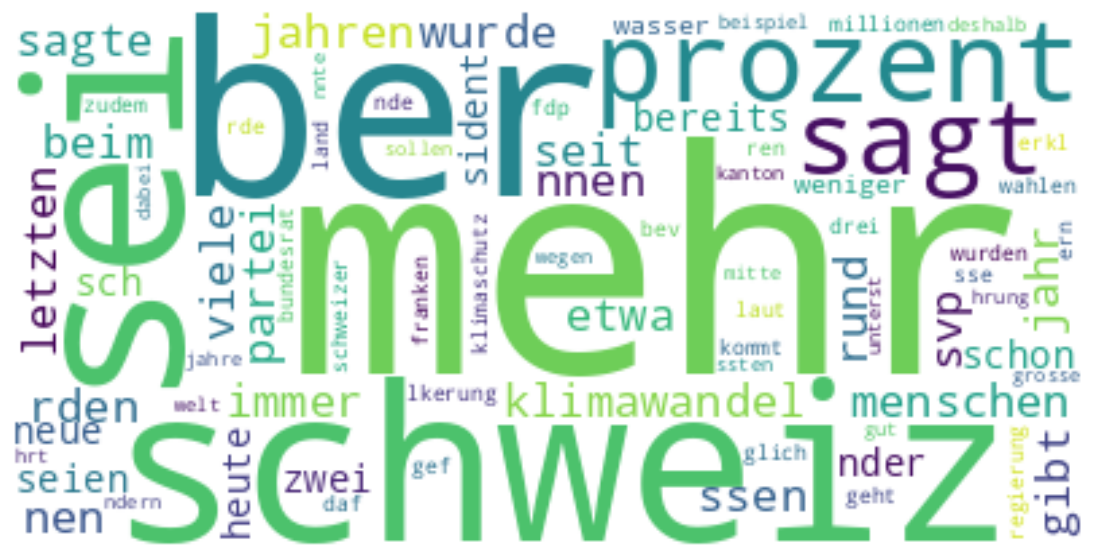

In [16]:
from wordcloud import WordCloud
text = ' '.join(df['text'])

# Calculate word frequency, count each word only once
word_freq = df['text'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, background_color="white", contour_width=3, contour_color='steelblue').generate_from_frequencies(word_freq)


plt.figure(figsize = (20,7))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [17]:

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

# Convert to list
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])


[['internationale', 'rote', 'liste', 'gef', 'hrdeten', 'arten', 'verbucht', 'mittlerweile', 'mehr', 'tier', 'pflanzenarten', 'bedroht', 'wwf', 'donnerstag', 'jahresbilanz', 'bedrohten', 'arten', 'erkl', 'rte', 'seien', 'knapp', 'prozent', 'liste', 'erfassten', 'spezies', 'grossen', 'verlierer', 'tierreich', 'rentiere', 'breitmaulnash', 'rner', 'gutes', 'jahr', 'best', 'nde', 'ckl', 'ufig', 'bedroht', 'brach', 'beispielsweise', 'bestand', 'weltweit', 'ssten', 'population', 'wild', 'lebenden', 'rentieren', 'jahr', 'heute', 'tiere', 'schicksal', 'steht', 'dabei', 'stellvertretend', 'tausender', 'arten', 'ebenfalls', 'stark', 'gef', 'hrdet', 'vergangenen', 'neun', 'jahren', 'fielen', 'best', 'nde', 'afrika', 'wilderei', 'knapp', 'individuen', 'gutes', 'jahr', 'schwebfliegen', 'europa', 'mehr', 'drittel', 'arten', 'neuen', 'roten', 'liste', 'zufolge', 'pestizideinsatz', 'klimakrise', 'bedroht', 'schlechtes', 'jahr', 'kaiserpinguin', 'sommer', 'sei', 'verpasst', 'worden', 'sste', 'pinguinart

## Create document-feature matrix (DFM)
#### Build the Bigram, Trigram Models and Lemmatize

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of lemmatized tokens
# tokens_lemmatized = [...]

# Join the lemmatized tokens into sentences
documents = [' '.join(tokens) for tokens in data_words]

# Create a DataFrame
df = pd.DataFrame({'text': documents})

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Create a DataFrame from the DTM (Document-Term Matrix)
dfm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Most frequent terms
top_features = dfm.sum().sort_values(ascending=False)

print("\nData top 50 terms:")
print("==================================\n")
# Display the top 50 terms
print(top_features.head(50))



Data top 50 terms:

mehr           987
ber            911
schweiz        799
sei            733
prozent        619
sagt           571
jahren         482
gibt           467
nnen           456
jahr           447
menschen       441
klimawandel    385
immer          374
nen            365
seit           361
wurde          344
ssen           331
rden           326
etwa           322
svp            295
sagte          295
viele          295
partei         286
beim           283
letzten        281
rund           280
bereits        279
neue           278
seien          276
schon          275
heute          271
nder           270
zwei           266
sident         265
sch            260
wasser         252
weniger        252
lkerung        249
laut           248
millionen      242
schweizer      242
rde            232
wahlen         228
ern            227
sse            220
klimaschutz    218
bev            213
wurden         210
kommt          210
geht           209
dtype: int64


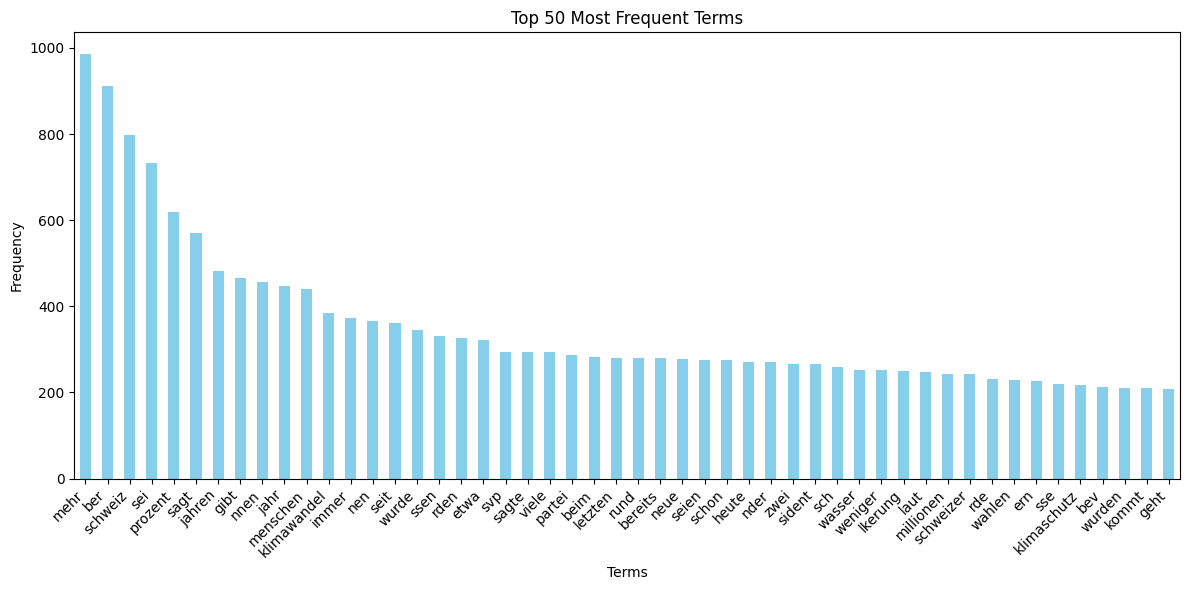

In [19]:
import matplotlib.pyplot as plt

# Plotting the top 50 terms
plt.figure(figsize=(12, 6))
top_features.head(50).plot(kind='bar', color='skyblue')
plt.title('Top 50 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Build the Bigram, Trigram Models and Lemmatize

Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

# Model Selection

## Build the Topic Model
### To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

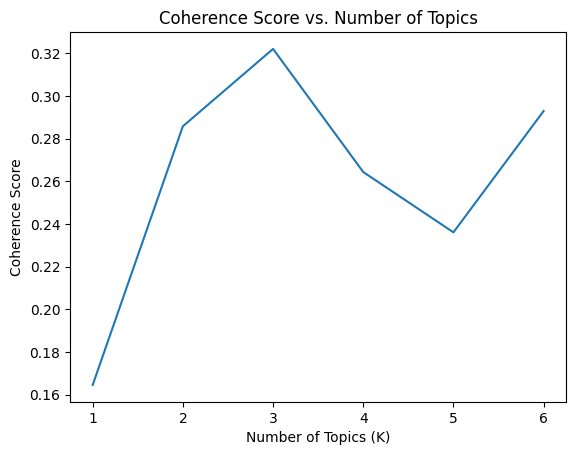

The best number of topics (K) is 3 with a coherence score of 0.3220648709153164


In [24]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Define a range of values for K (number of topics)
k_values = range(1, 7)  # Try values from 1 to 10

# Initialize a list to store coherence scores for each K
coherence_scores = []

# Iterate over different values of K
for k in k_values:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=k,  # Set the number of topics to k
                                                random_state=100,
                                                update_every=1,
                                                chunksize=10,
                                                passes=10,
                                                alpha='symmetric',
                                                iterations=100,
                                                per_word_topics=True)

    # Calculate coherence score for the LDA model
    coherence_model = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores to find the best value of K
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(k_values)
plt.show()

# Find the best value of K with the highest coherence score
best_k = k_values[coherence_scores.index(max(coherence_scores))]
print(f"The best number of topics (K) is {best_k} with a coherence score of {max(coherence_scores)}")

In [25]:
# Build the final LDA model with the best K
final_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=best_k,
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=10,
                                                   passes=10,
                                                   alpha='symmetric',
                                                   iterations=100,
                                                   per_word_topics=True)
pprint(final_lda_model.print_topics())

[(0,
  '0.011*"mehr" + 0.011*"etwa" + 0.009*"rden" + 0.008*"ber" + 0.008*"prozent" '
  '+ 0.007*"bereit" + 0.006*"gibt" + 0.006*"staaten" + 0.005*"frage" + '
  '0.005*"sagt"'),
 (1,
  '0.014*"partei" + 0.012*"prozent" + 0.010*"fdp" + 0.008*"svp" + 0.007*"ber" '
  '+ 0.006*"klimaschutz" + 0.005*"wahlen" + 0.005*"gas" + 0.005*"letzten" + '
  '0.005*"gesetz"'),
 (2,
  '0.006*"arten" + 0.006*"bedroht" + 0.005*"nder" + 0.005*"land" + '
  '0.004*"europa" + 0.004*"krise" + 0.004*"welt" + 0.004*"region" + '
  '0.003*"hilfe" + 0.003*"schutz"')]


## Metrics

In [26]:

# Compute Perplexity
print('\nPerplexity: ', final_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
coherence_model_lda = CoherenceModel(model=final_lda_model, texts=data_ready, dictionary=id2word, coherence='c_v') # CoherenceModel used for evaluation of topic models.
coherence_lda = coherence_model_lda.get_coherence() # Get coherence value based on pipeline parameters.
print('\nCoherence Score: ', coherence_lda) # Print the Coherence Score


Perplexity:  -9.030718220883745

Coherence Score:  0.3220648709153164


# What is the Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.



In [58]:
import pandas as pd

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Initialize variables to store dominant topic info
        dominant_topic = None
        topic_contribution = None
        topic_keywords = None

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                dominant_topic = int(topic_num)
                topic_contribution = round(prop_topic, 4)
            else:
                break

        # Remove square brackets and comma-separated values from text
        cleaned_text = ' '.join(texts[i]).replace('[', '').replace(']', '').replace(',', '')

        # Add dominant topic info and cleaned text to the output
        sent_topics.append({
            'Dominant_Topic': dominant_topic,
            'Perc_Contribution': topic_contribution,
            'Topic_Keywords': topic_keywords,
            'Text': cleaned_text
        })

    # Convert list of dictionaries into DataFrame
    sent_topics_df = pd.DataFrame(sent_topics)
    return sent_topics_df

# Call the function with appropriate arguments
df_topic_sents_keywords = format_topics_sentences(ldamodel=final_lda_model, corpus=corpus, texts=data_ready)

# Print or return the resulting DataFrame
df_topic_sents_keywords


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,2,0.5407,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz",gef_hrdeten arten mittlerweile mehr tier pflanzenarten bedroht wwf donnerstag jahresbilanz bedro...
1,2,0.4361,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz",welt derart lot mehr normal erscheint spurensuche mehr normal gesellschaft rande titelt ngste bu...
2,0,0.9867,"mehr, etwa, rden, ber, prozent, bereit, gibt, staaten, frage, sagt",rre steine schneemangel rften erst vorgeschmack erwarten somit besonder gut rund investor rechne...
3,0,0.5407,"mehr, etwa, rden, ber, prozent, bereit, gibt, staaten, frage, sagt",funktioniert wichtige direkten demokratie beteiligen bildungsreform miterlebt seit paar jahren o...
4,2,0.4886,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz",minuten violet jahre violet demonstriere tten vorne strasse monaten freilassung kaution mindeste...
...,...,...,...,...
535,2,0.7361,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz",rfer mehr hundert hunderte weitere sonntagabend bundesstaat sprach zun_chst insgesamt mindesten ...
536,2,0.6714,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz",wwf durchwachsene ende gehenden jahre hlten international indien tierart verlangsamt ebenfall ww...
537,0,0.9440,"mehr, etwa, rden, ber, prozent, bereit, gibt, staaten, frage, sagt",trocken schlagzeilen teile ostk australien befinden art zumindest rksten bev berflutet stromnetz...
538,0,0.5229,"mehr, etwa, rden, ber, prozent, bereit, gibt, staaten, frage, sagt",lage bedrohlich deutsche wetterdienst sagt weitere allerding sagt wetterdienst offenbach regenme...


In [61]:
# Save the DataFrame to a CSV file
df_topic_sents_keywords.to_csv('/content/drive/MyDrive/German Articles Topic Modeling/dominant_topic_sents_keywords.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# The most representative sentence for each topic

Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [38]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9990,"mehr, etwa, rden, ber, prozent, bereit, gibt, staaten, frage, sagt","[ackerland, fast, prozent, pflanzen, stark, vegane, alternativen, realistisch, welt, tte, vegane..."
1,1,0.9882,"partei, prozent, fdp, svp, ber, klimaschutz, wahlen, gas, letzten, gesetz","[weichelt, srf, partei, dezember, ckgang, hleranteil, prozent, letzten, bev_lkerung, vertreten, ..."
2,2,0.9759,"arten, bedroht, nder, land, europa, krise, welt, region, hilfe, schutz","[empfe, camilla, flughafen, parisorly, rote, ausgerollt, plattform, twitter, royal, land, zun_ch..."


# Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

# Word Clouds of Top N Keywords in Each Topic

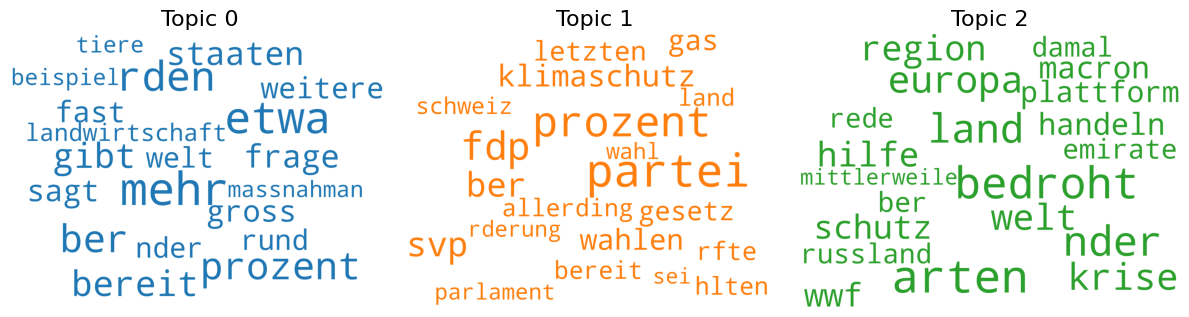

In [40]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = final_lda_model.show_topics(num_words=30,formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(12,11), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

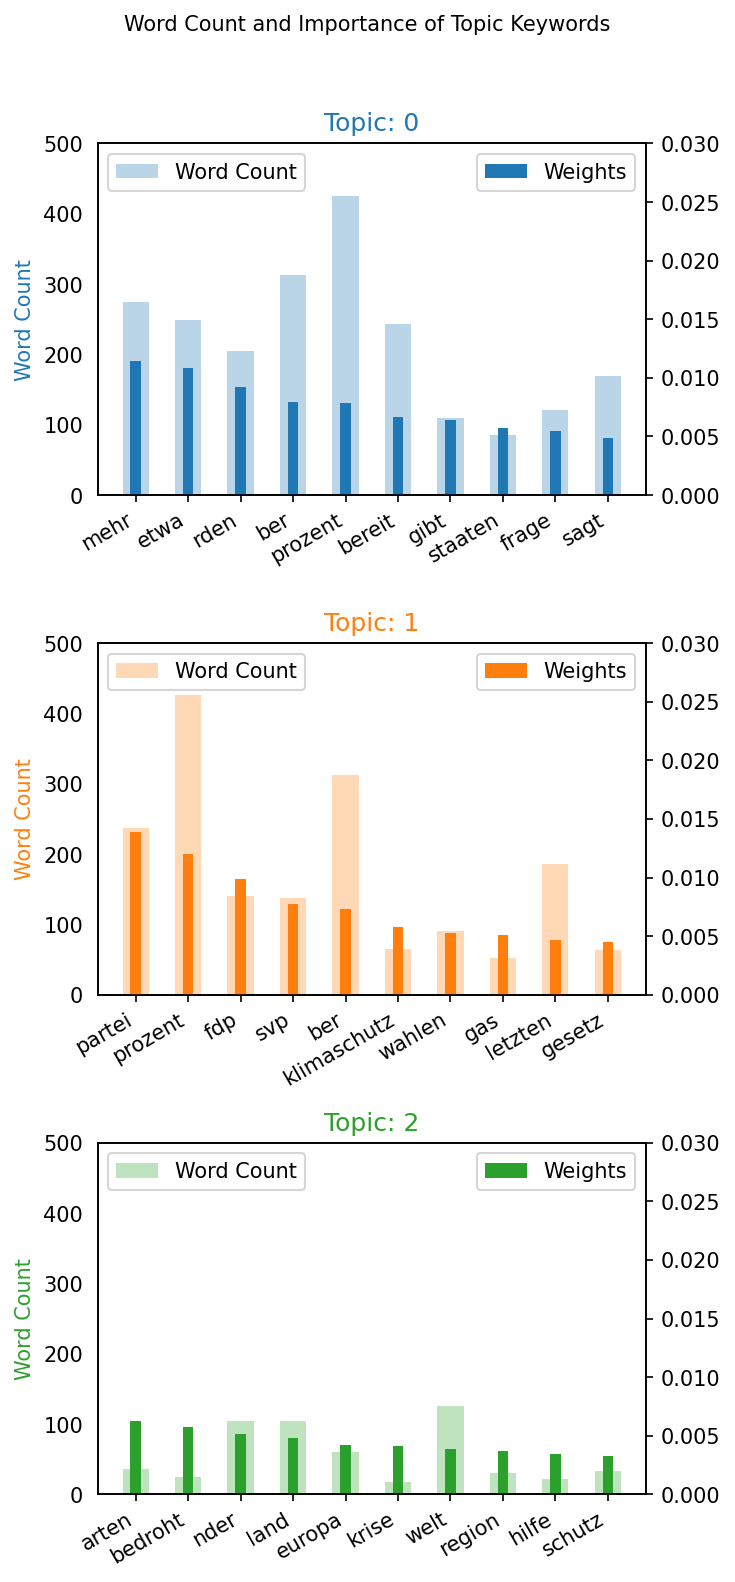

In [47]:
from collections import Counter
topics = final_lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(5,10), sharey=True, dpi=150)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)
plt.show()

# Topic Analyses

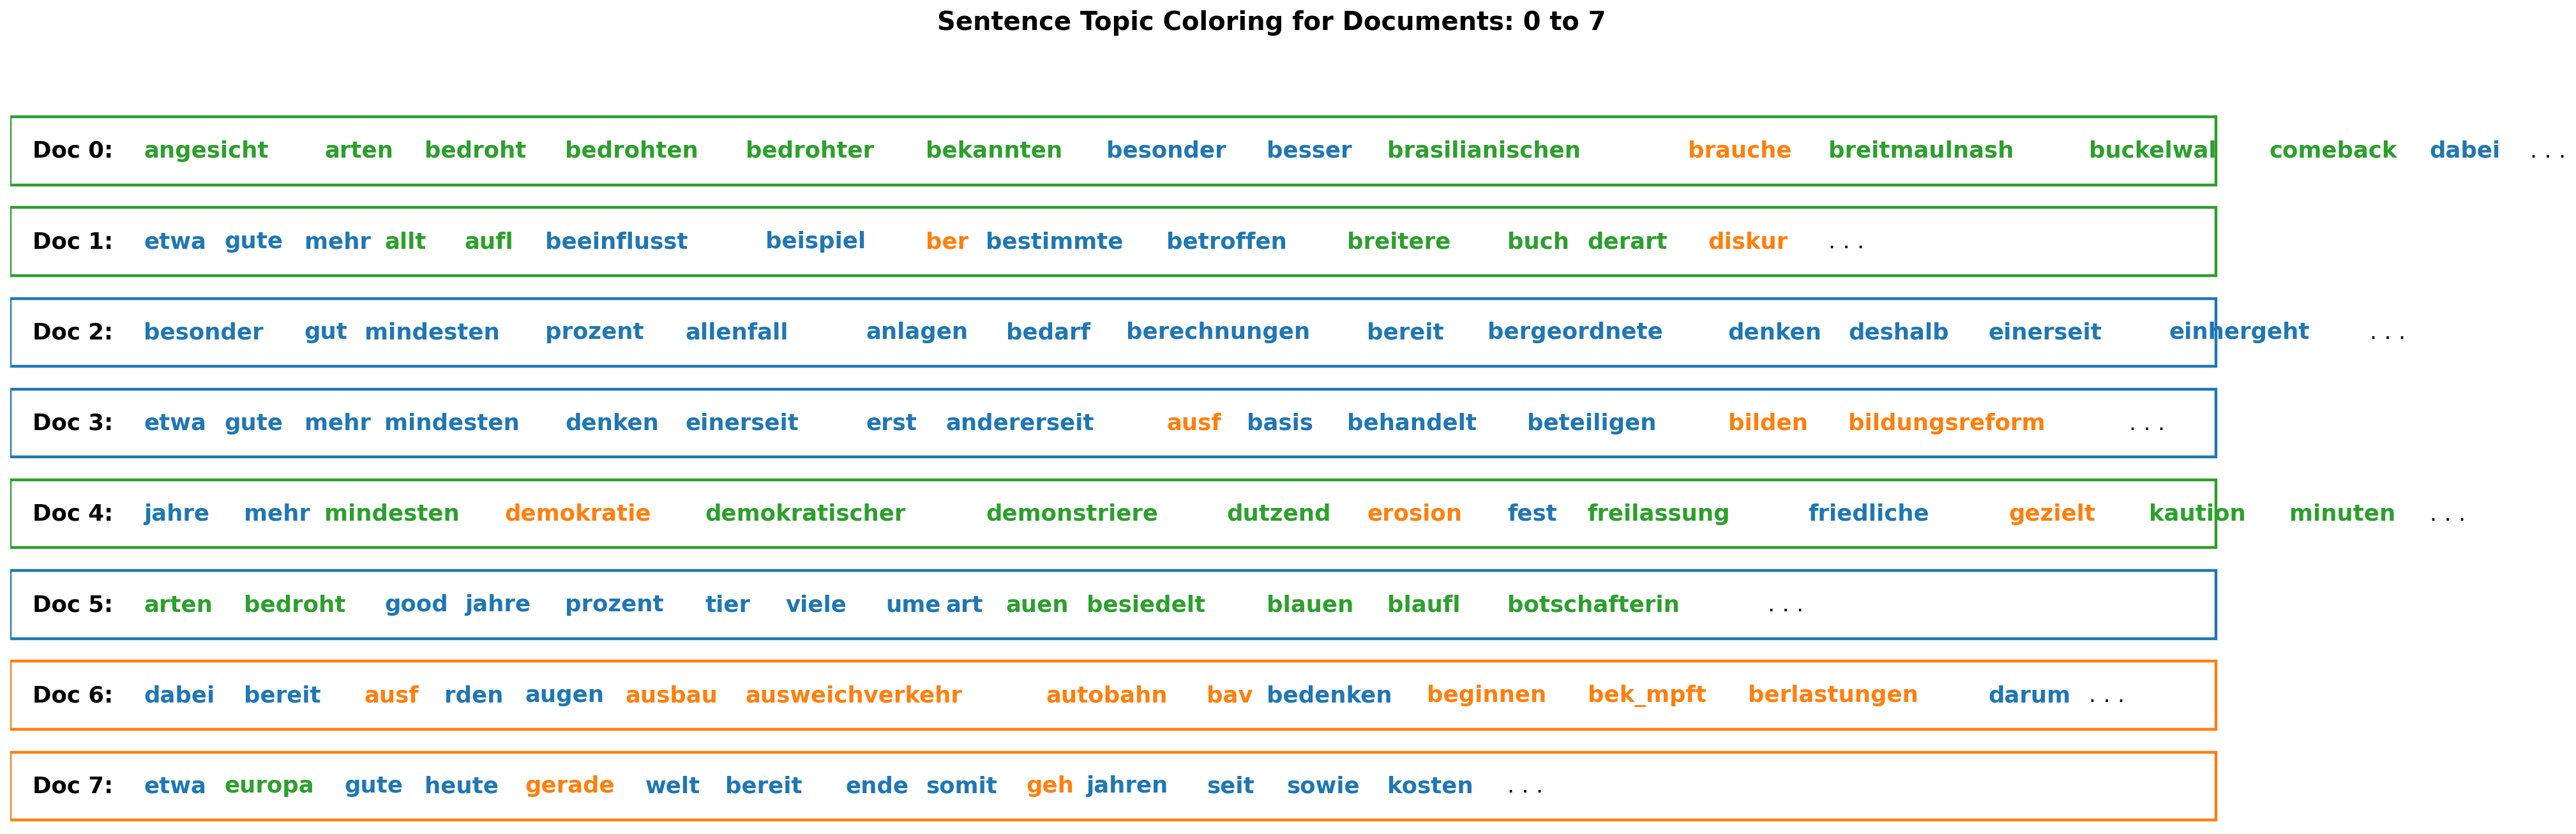

In [48]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=final_lda_model, corpus=corpus, start = 0, end = 9):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(25, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(final_lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=18, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

# What are the most discussed topics in the documents?

In [49]:
def topics_per_document(model, corpus, start=0, end=None):
    corpus_sel = corpus[start:end] if end is not None else corpus[start:]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=final_lda_model, corpus=corpus, end=None)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in final_lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [50]:
df_top3words

,topic_id,words
0,0,"mehr, \netwa, \nrden"
1,1,"partei, \nprozent, \nfdp"
2,2,"arten, \nbedroht, \nnder"


In [51]:
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
dominant_topic_in_each_doc

Dominant_Topic
0    262
1    176
2    102
dtype: int64

### The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
### The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

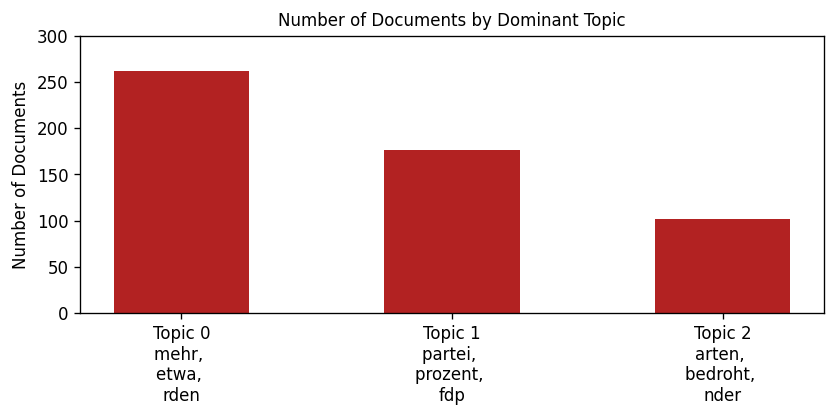

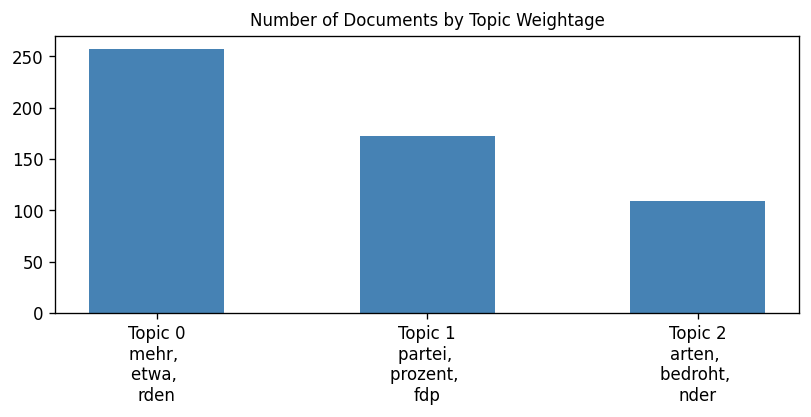

In [52]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Plot
fig, ax1 = plt.subplots(figsize=(8, 3), dpi=120)
fig, ax2 = plt.subplots(figsize=(8, 3), dpi=120)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 300)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()


In [55]:
# pyLDAvis is insatlled to display the models
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.5 MB/s eta 0:00:00


**Intertopic Distance Map (via multidimensional scaling)**
Visualize the topics-keywords

In [56]:
# Visualize the topicss
# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(final_lda_model, corpus, id2word) # General Use. prepare(): transform and prepare a LDA model's data for visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.171973  0.043668       1        1  51.046352
1      0.042063 -0.150062       2        1  30.791316
2      0.129910  0.106395       3        1  18.162332, topic_info=           Term        Freq       Total Category  logprob  loglift
403      partei  161.000000  161.000000  Default  30.0000  30.0000
1015        fdp  115.000000  115.000000  Default  29.0000  29.0000
555         svp   90.000000   90.000000  Default  28.0000  28.0000
56      prozent  292.000000  292.000000  Default  27.0000  27.0000
684        gibt  124.000000  124.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
832       damal   15.725458   36.404791   Topic3  -6.0789   0.8664
225    probleme   13.736153   23.432665   Topic3  -6.2141   1.1717
97         geht   13.156073   20.857090   Topic3  -6.2573   1.2450
83          ber   16.291335  255.633686   Topic3  -6.0435  -1.0473
50    mindesten   13.083563   58.720364   Topic3  -6.2628   0.2044

[186 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
422       1  0.562905       allerding
422       2  0.432231       allerding
3705      2  0.989073  ampelkoalition
0         1  0.072107       angesicht
0         3  0.937388       angesicht
...     ...       ...             ...
78        1  0.306791             wwf
78        2  0.030679             wwf
78        3  0.674940             wwf
7724      3  0.968641       zeitweise
1306      3  0.919231        zun_chst

[223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])